Import main classes

In [1]:
from hari_plotter import HariGraph, HariDynamics

Create Graph

In [2]:
H = HariGraph.strongly_connected_components(10,10,3)

Get Graph Info

In [3]:
print(f'{H = }')
print(f'{H.weighted_mean_value = }')

H = <HariGraph object at 139724767774464: 20 nodes, 183 edges>
H.weighted_mean_value = 0.48557072987458094


Use node_values to get the parameters that are updating at the merge of nodes

In [4]:
print(f'{H.node_values.keys() = }')
print(f'{H.node_values["min_value"][0] =}')

H.node_values.keys() = dict_keys(['value', 'label', 'max_value', 'min_value'])
H.node_values["min_value"][0] =0.90564945442239


Draw Graph

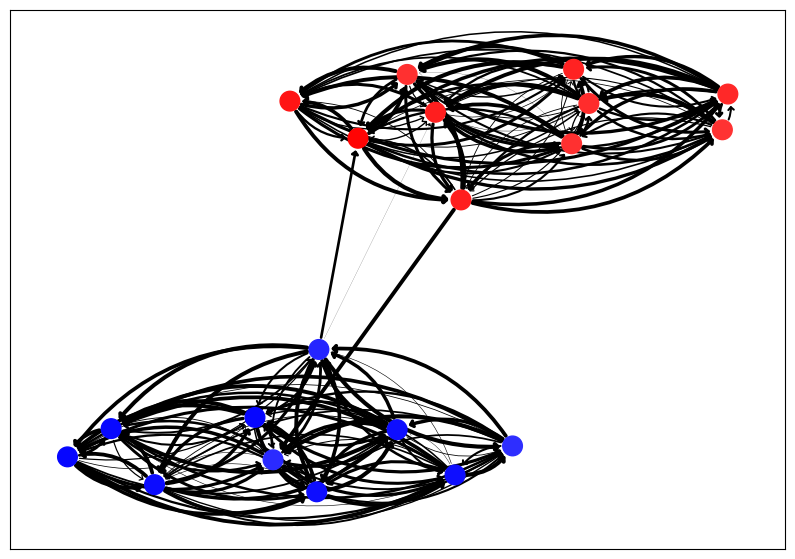

(<Figure size 1000x700 with 1 Axes>, <Axes: >)

In [5]:
H.draw()

Simplify the graph

In [6]:
print(f'{H = }')
H.merge_by_intervals([0.5])
print(f'{H = }')

H = <HariGraph object at 139724767774464: 20 nodes, 183 edges>
H = <HariGraph object at 139724767774464: 2 nodes, 2 edges>


Read the graph from Network

In [7]:
H = HariGraph.read_network('../tests/network.txt', '../tests/opinions_0.txt')
print(f'{H = }')

H = <HariGraph object at 139724731047248: 5 nodes, 6 edges>


Read Dynamics from Network

In [8]:
HD = HariDynamics.read_network('../tests/5_ring/network.txt', [f'../tests/5_ring/opinions_{i}.txt' for i in range(3)])
print(f'{HD = }')

HD = <hari_plotter.hari_dynamics.HariDynamics object at 0x7f1432f5df60>


The first call of the image will initialize it

In [9]:
print(HD[0])
print(f'{HD[0].weighted_mean_value = }')
print(HD[0])

<Uninitialized LasyHariGraph object at 139724731048928>
HD[0].weighted_mean_value = 0.6279692643403699
<LasyHariGraph with 5 nodes and 6 edges>


Find the mapping for one image

In [10]:
for _ in range(2):
    HD[2].simplify_graph_one_iteration()
    print(HD[2])


<LasyHariGraph with 4 nodes and 4 edges>
<LasyHariGraph with 3 nodes and 3 edges>


The rest of the images were not affected

In [11]:
print(HD[1])

<Uninitialized LasyHariGraph object at 139724731047728>


Update all images based on the mapping of one

In [12]:
# HD.merge_nodes_based_on_mapping(HD[2].get_cluster_mapping())
print(HD[0].labels)
print(HD[2].labels)
HD.merge_nodes_based_on_index(2)

[[0], [1], [3], [2], [4]]
[[4], [0, 1], [3, 2]]
mapping = {4: {4}, 5: {0, 1}, 6: {2, 3}}


In [13]:
print([d.keys() for d in HD.node_values])
print([set(HD[i].node_values['value'].keys()) for i in range(3)])

[dict_keys(['value', 'label', 'max_value', 'min_value']), dict_keys(['value', 'label', 'max_value', 'min_value']), dict_keys(['value', 'label', 'max_value', 'min_value'])]
[{4, 5, 6}, {4, 5, 6}, {4, 5, 6}]


Plot the dymamics

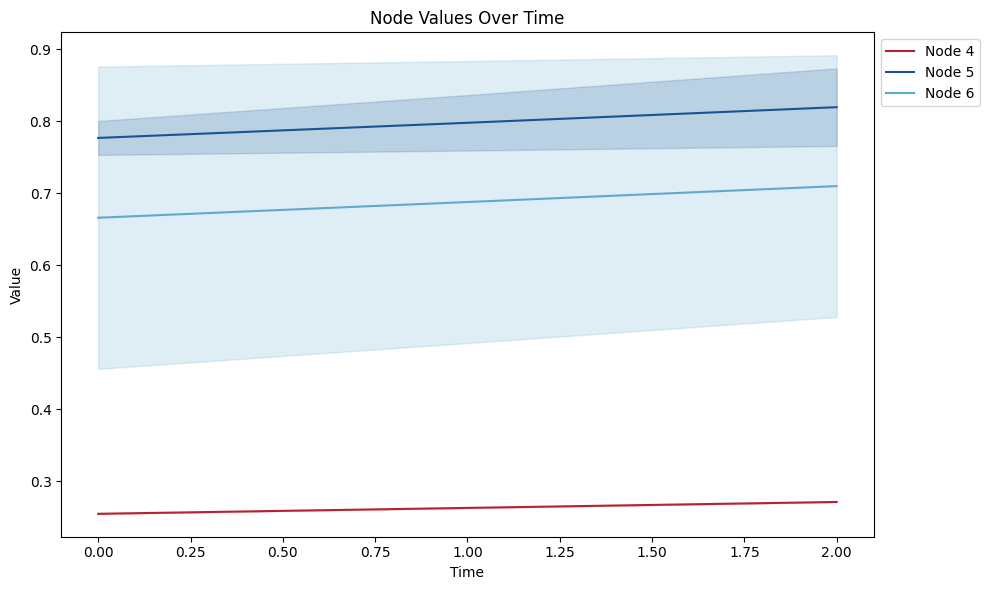

In [14]:
HD.plot_values(reference_index=0)